# MINI PROJECT 02

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Input
from tensorflow.keras.regularizers import l2

In [42]:
import pandas as pd
data = pd.read_csv('Housing.csv')


Missing value check 

In [43]:
data.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [44]:
data.fillna(method='ffill', inplace=True)  # Forward fill


C:\Users\kkrab\AppData\Local\Temp\ipykernel_16928\3561118095.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill


Remove Duplicate 

In [45]:
data.drop_duplicates(inplace=True)


Other Detection 

In [46]:
from scipy import stats
import numpy as np
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]


EDA

In [47]:
data.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.220000e+02,522.000000,522.000000,522.000000,522.000000,522.000000
mean,4.628689e+06,5002.262452,2.929119,1.245211,1.796935,0.660920
std,1.656354e+06,1920.157898,0.704220,0.430625,0.870144,0.841558
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3525.000000,2.000000,1.000000,1.000000,0.000000
50%,4.270000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,5.600000e+06,6288.500000,3.000000,1.000000,2.000000,1.000000
max,9.870000e+06,11460.000000,5.000000,2.000000,4.000000,3.000000


Correlation Analysis 

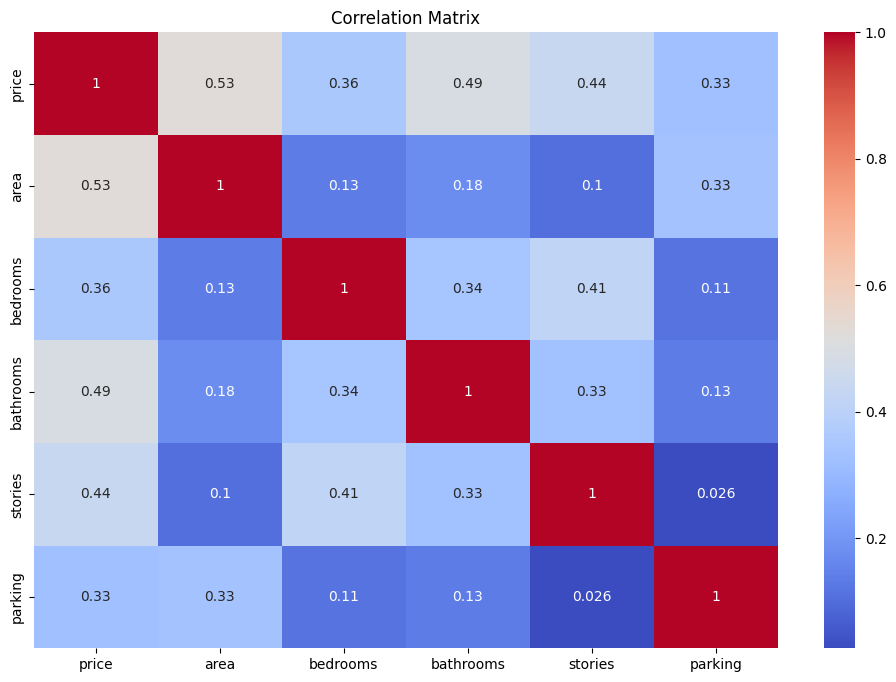

In [48]:
data = data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Feature Distribution

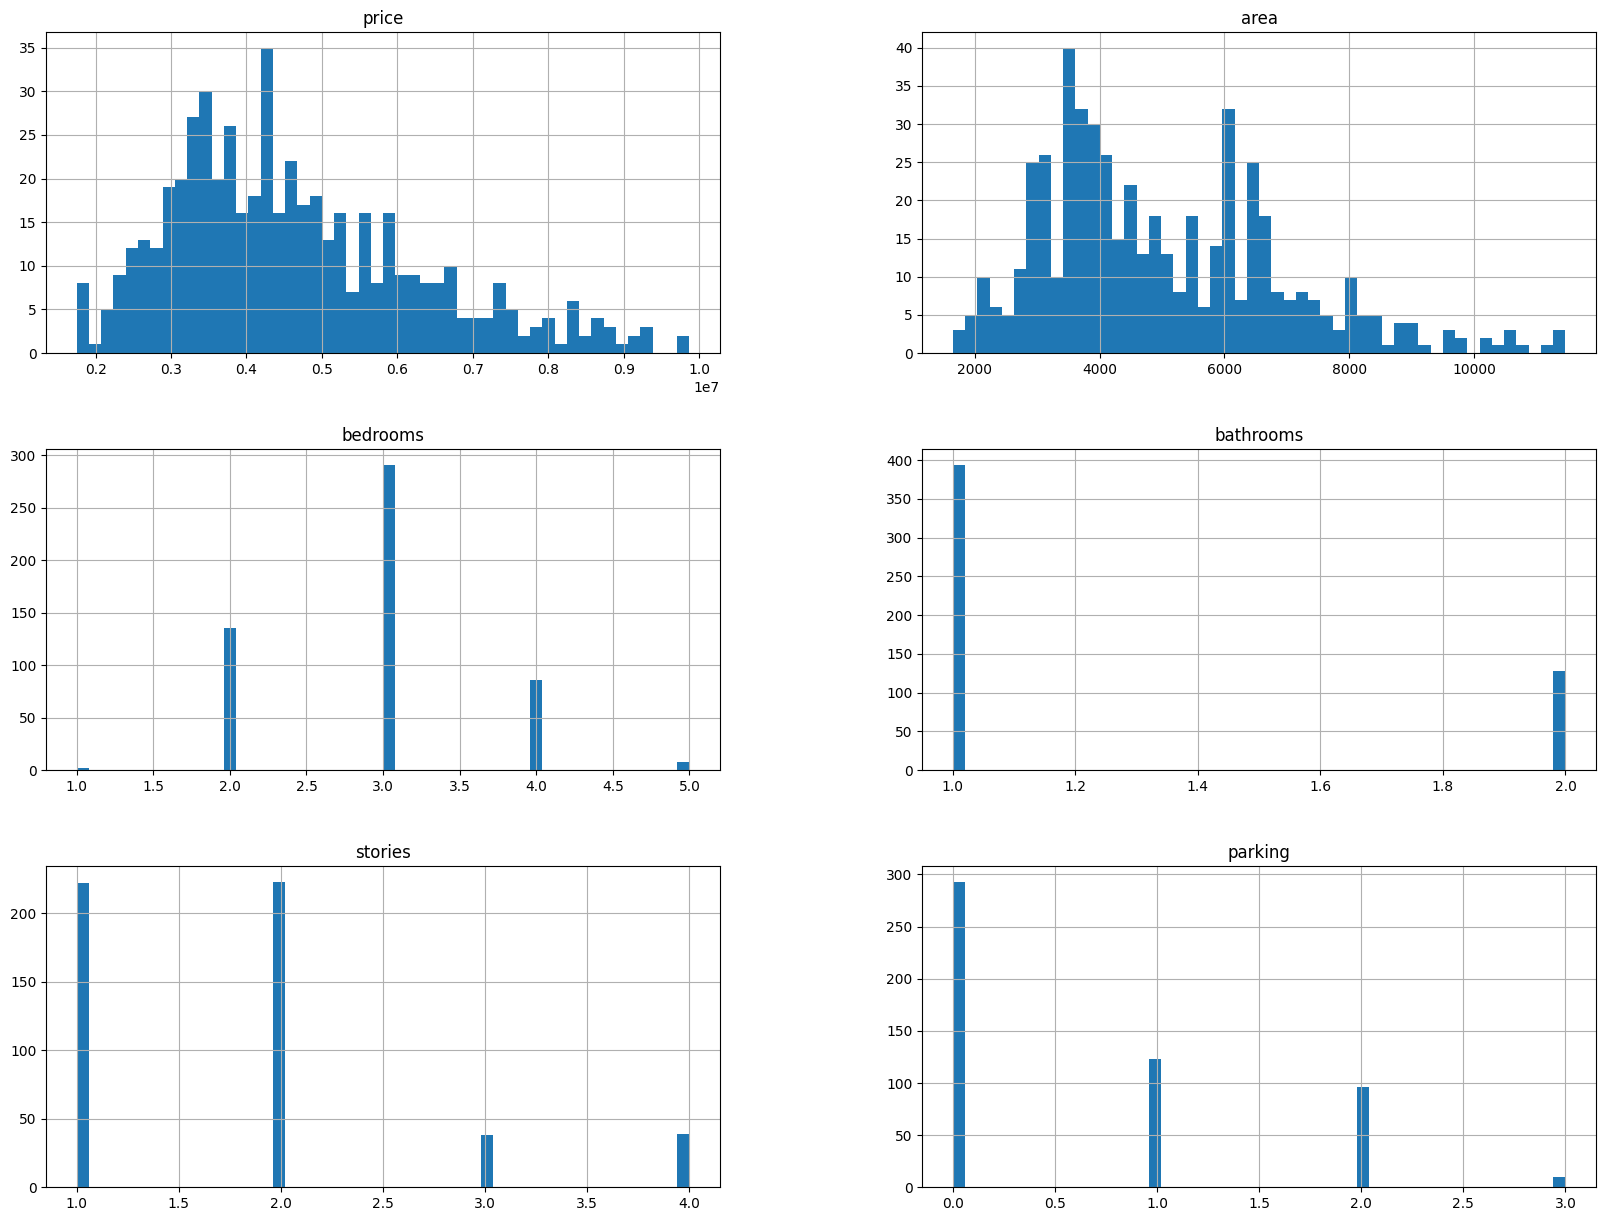

In [49]:
data.hist(bins=50, figsize=(20,15))
plt.show()


Feature Relation

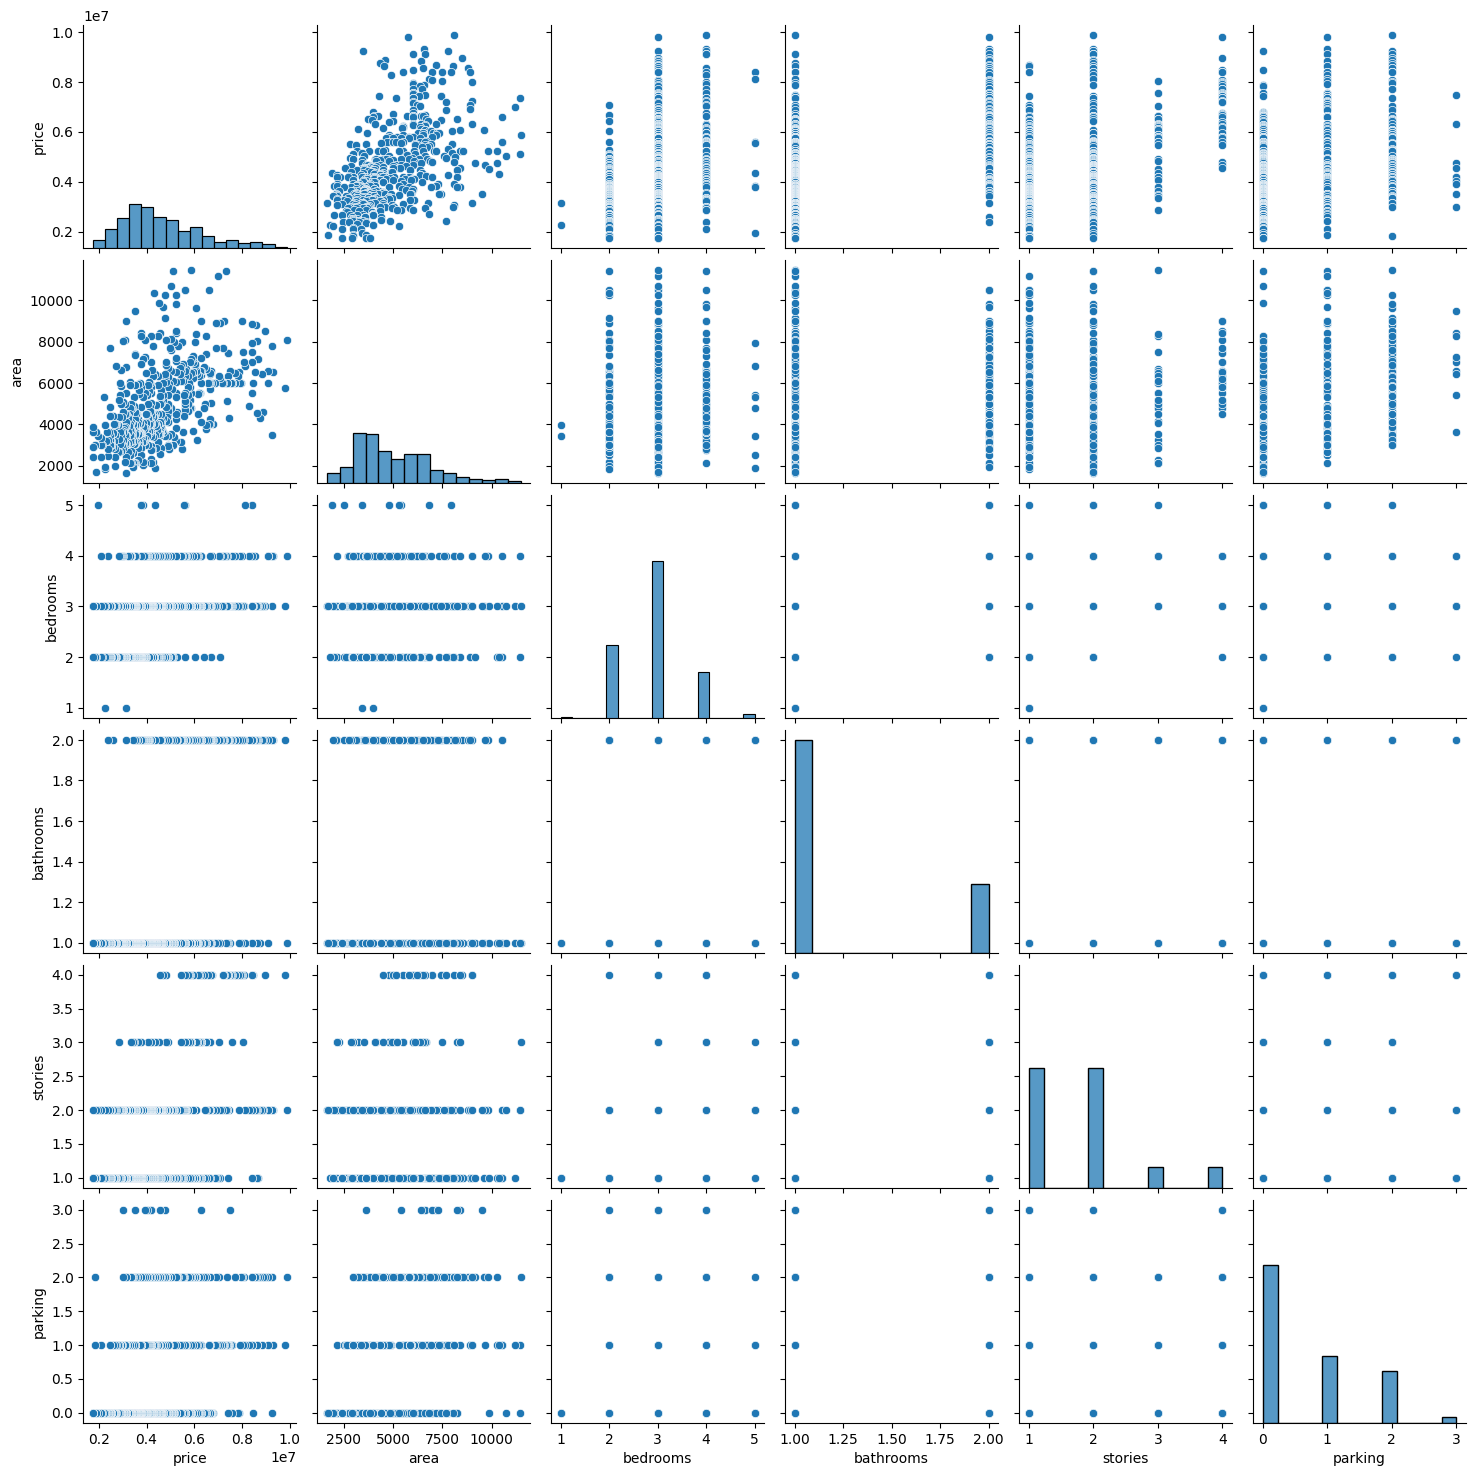

In [50]:
sns.pairplot(data)
plt.show()


#### Data Transformation 

Feature Scaling


In [51]:
print(data.dtypes)

price        int64
area         int64
bedrooms     int64
bathrooms    int64
stories      int64
parking      int64
dtype: object


In [52]:

X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']] 
y = data['price']  


In [53]:

scaler = StandardScaler()


X_scaled = scaler.fit_transform(X)

print(X_scaled)  


[[ 1.6148198   1.52212143 -0.5699764   0.23359353  1.592718  ]
 [ 0.38978815  0.10074865  1.75445861  2.53426948  0.40330627]
 [ 0.8068202   1.52212143  1.75445861  0.23359353  0.40330627]
 ...
 [-0.72055968 -1.32062413 -0.5699764  -0.91674444 -0.78610545]
 [-1.09067563  0.10074865 -0.5699764  -0.91674444 -0.78610545]
 [-0.60066297  0.10074865 -0.5699764   0.23359353 -0.78610545]]


#### Ststical Testing

Hypothesis

In [54]:
from scipy.stats import ttest_ind


feature1 = 'area'
feature2 = 'bedrooms'

t_stat, p_value = ttest_ind(data[feature1], data[feature2])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 59.485398283776355
P-value: 0.0


Feature Importance

In [55]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_


#### Model Training and Evaluation

Baseline Regression

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"{name} MSE: {mse}")


SVR MSE: 3970028557134.532
Linear Regression MSE: 1630918806023.788
Random Forest MSE: 2037400465862.4263
Decision Tree MSE: 3307939191407.407
Gradient Boosting MSE: 1754067873213.9167


#### ANN Model

c:\Users\kkrab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 23770397933568.0000 - val_loss: 23329048100864.0000
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22694993068032.0000 - val_loss: 23319149543424.0000
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 23436611026944.0000 - val_loss: 23308280004608.0000
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25153681489920.0000 - val_loss: 23296309460992.0000
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 23545992183808.0000 - val_loss: 23282787024896.0000
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23374476607488.0000 - val_loss: 23266102083584.0000
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24104591687680.0000 - val_loss: 23245661143040.0000
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23483943747584.0000 - val_loss: 23220996538368.0000
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24462080606208.0000 - val_loss: 231909506416

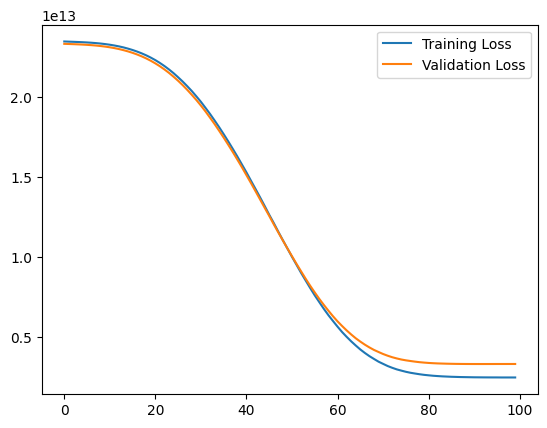

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='linear'))

ann_model.compile(optimizer='adam', loss='mean_squared_error')

history = ann_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

# Plot error curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
